# FitBit Data Exploration
**Author**: Fadhil Umar    
**Date**: 2023-10-10  
**Purpose** : This notebook is intended for Google Data Analytics Capstone Project  
**Description** :  
In this case study, we consider the company **Bellabeat**, a high-tech manufacturer of health-focused smart products for women.  
Our tasks is to focus on one of Bellabeat’s products and analyze **smart device data** to gain insight into how **consumers** are using their smart devices and **improve marketing strategy**.

### Import Necessary Packages

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Load Data
We use 6 of data because we will only analyze daily and hourly data to keep it consistent.

In [2]:
activity_daily <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories_hourly <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities_hourly <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
steps_hourly <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep_daily <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

### Data Overview
Our initial look of the data

In [3]:
summary(activity_daily)

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

In [4]:
summary(calories_hourly)

       Id            ActivityHour          Calories     
 Min.   :1.504e+09   Length:22099       Min.   : 42.00  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 63.00  
 Median :4.445e+09   Mode  :character   Median : 83.00  
 Mean   :4.848e+09                      Mean   : 97.39  
 3rd Qu.:6.962e+09                      3rd Qu.:108.00  
 Max.   :8.878e+09                      Max.   :948.00  

In [5]:
summary(intensities_hourly)

       Id            ActivityHour       TotalIntensity   AverageIntensity
 Min.   :1.504e+09   Length:22099       Min.   :  0.00   Min.   :0.0000  
 1st Qu.:2.320e+09   Class :character   1st Qu.:  0.00   1st Qu.:0.0000  
 Median :4.445e+09   Mode  :character   Median :  3.00   Median :0.0500  
 Mean   :4.848e+09                      Mean   : 12.04   Mean   :0.2006  
 3rd Qu.:6.962e+09                      3rd Qu.: 16.00   3rd Qu.:0.2667  
 Max.   :8.878e+09                      Max.   :180.00   Max.   :3.0000  

In [6]:
summary(steps_hourly)

       Id            ActivityHour         StepTotal      
 Min.   :1.504e+09   Length:22099       Min.   :    0.0  
 1st Qu.:2.320e+09   Class :character   1st Qu.:    0.0  
 Median :4.445e+09   Mode  :character   Median :   40.0  
 Mean   :4.848e+09                      Mean   :  320.2  
 3rd Qu.:6.962e+09                      3rd Qu.:  357.0  
 Max.   :8.878e+09                      Max.   :10554.0  

In [7]:
summary(sleep_daily)

       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

In [8]:
summary(weight_log)

       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      Fat             BMI        IsManualReport         LogId          
 Min.   :22.00   Min.   :21.45   Length:67          Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   Class :character   1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   Mode  :character   Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                      Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                      3rd 

There are several **key** observations:
- There are extremely **high sedentary minutes** tracked, with an average of 911 minutes.
- Users exhibit **light activity levels**, with an average intensity of 0.2.
- The recorded weights of users tend to **hover around 72 kg**.
- The average sleep duration is **approximately 7 hours per day**.

### Data Preprocessing
We proceed to clean the data for further analysis. 

In [9]:
# Convert ActivityDate to Date format
activity_daily$ActivityDate <- as.Date(activity_daily$ActivityDate, format = "%m/%d/%Y")

# Calculate relevant statistics
num_rows <- nrow(activity_daily)
min_date <- min(activity_daily$ActivityDate)
max_date <- max(activity_daily$ActivityDate)
num_days <- as.numeric(difftime(max_date, min_date, units = "days"))+1
num_users <- length(unique(activity_daily$Id))

# Print the information
print(paste("There are", num_rows, "rows"))
print(paste("From", min_date, "to", max_date))
print(paste("There are", num_days, "days"))
print(paste("With", num_users, "users"))

[1] "There are 940 rows"
[1] "From 2016-04-12 to 2016-05-12"
[1] "There are 31 days"
[1] "With 33 users"


In [10]:
# We merge hourly data and seperate date and time columns
merged_hourly <- calories_hourly %>%
merge(intensities_hourly, by = c("Id", "ActivityHour")) %>%
merge(steps_hourly, by = c("Id", "ActivityHour")) %>% 
mutate(
    ActivityHour = mdy_hms(ActivityHour),  # Convert to POSIXct format
    date = as.Date(ActivityHour),         # Extract date
    time = format(ActivityHour, "%H:%M:%S") # Extract time
  )

head(merged_hourly)

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal,date,time
,<dbl>,<dttm>,<int>,<int>,<dbl>,<int>,<date>,<chr>
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160,2016-04-12,01:00:00
2,1503960366,2016-04-12 13:00:00,66,6,0.100000,221,2016-04-12,13:00:00
3,1503960366,2016-04-12 10:00:00,99,29,0.483333,676,2016-04-12,10:00:00
4,1503960366,2016-04-12 22:00:00,65,9,0.150000,89,2016-04-12,22:00:00
5,1503960366,2016-04-12 11:00:00,76,12,0.200000,360,2016-04-12,11:00:00
6,1503960366,2016-04-12 23:00:00,81,21,0.350000,338,2016-04-12,23:00:00


In [11]:
# We format the date column as Date
sleep_daily <- sleep_daily %>%
  mutate(
    SleepDay = mdy_hms(SleepDay),  # Convert to POSIXct format
    SleepDate = as.Date(SleepDay)  # Extract date
  ) 

head(sleep_daily)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepDate
,<dbl>,<dttm>,<int>,<int>,<int>,<date>
1,1503960366,2016-04-12,1,327,346,2016-04-12
2,1503960366,2016-04-13,2,384,407,2016-04-13
3,1503960366,2016-04-15,1,412,442,2016-04-15
4,1503960366,2016-04-16,2,340,367,2016-04-16
5,1503960366,2016-04-17,1,700,712,2016-04-17
6,1503960366,2016-04-19,1,304,320,2016-04-19


In [12]:
# We seperate the datetime into date and time columns
weight_log <- weight_log %>%
  mutate(
    Datetime = mdy_hms(Date),  # Convert to POSIXct format
    date = as.Date(Datetime),         # Extract date
    time = format(Datetime, "%H:%M:%S") # Extract time
  )

head(weight_log)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Datetime,date,time
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dttm>,<date>,<chr>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12,2016-05-02 23:59:59,2016-05-02,23:59:59
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12,2016-05-03 23:59:59,2016-05-03,23:59:59
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12,2016-04-13 01:08:52,2016-04-13,01:08:52
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12,2016-04-21 23:59:59,2016-04-21,23:59:59
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12,2016-05-12 23:59:59,2016-05-12,23:59:59
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12,2016-04-17 23:59:59,2016-04-17,23:59:59


In [13]:
# We calculate Intentsity score by this formula
# Intensity score : 0*sedentary + 1*light + 2*moderate + 3*high
# This score serves as numerical representation of user intensity
activity_daily <- activity_daily %>%
  mutate(dayname = wday(ActivityDate, label = TRUE, abbr = FALSE),
         intensity_minutes = 0*SedentaryMinutes + 
                       1*LightlyActiveMinutes + 
                       2*FairlyActiveMinutes + 
                       3*VeryActiveMinutes,
         intensity_distance = 0*SedentaryActiveDistance + 
                         1*LightActiveDistance + 
                         2*ModeratelyActiveDistance + 
                         3*VeryActiveDistance)

head(activity_daily)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,dayname,intensity_minutes,intensity_distance
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<ord>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday,429,12.80
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday,318,10.80
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday,293,12.03
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday,364,11.77
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday,349,13.99
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday,318,13.64


In [14]:
summary(activity_daily[, c("intensity_minutes", "intensity_distance")])

 intensity_minutes intensity_distance
 Min.   :  0.0     Min.   : 0.000    
 1st Qu.:163.5     1st Qu.: 2.680    
 Median :300.0     Median : 6.570    
 Mean   :283.4     Mean   : 8.984    
 3rd Qu.:398.2     3rd Qu.:12.533    
 Max.   :904.0     Max.   :76.050    

In [15]:
# We merge both daily activity and sleep daily data
merged_daily <- merge(activity_daily, sleep_daily, by.x = c("Id", "ActivityDate"), by.y = c("Id", "SleepDate"))

head(merged_daily)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,LightlyActiveMinutes,SedentaryMinutes,Calories,dayname,intensity_minutes,intensity_distance,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<ord>,<dbl>,<dbl>,<dttm>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,328,728,1985,Tuesday,429,12.80,2016-04-12,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,217,776,1797,Wednesday,318,10.80,2016-04-13,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,209,726,1745,Friday,364,11.77,2016-04-15,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,221,773,1863,Saturday,349,13.99,2016-04-16,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,164,539,1728,Sunday,318,13.64,2016-04-17,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,264,775,2035,Tuesday,476,18.26,2016-04-19,1,304,320


In [16]:
merged_daily$SleepError <- abs(merged_daily$TotalMinutesAsleep - mean(merged_daily$TotalMinutesAsleep))

### Data Analysis
After cleaning the data, we can observe pattern in the data further using visualization.

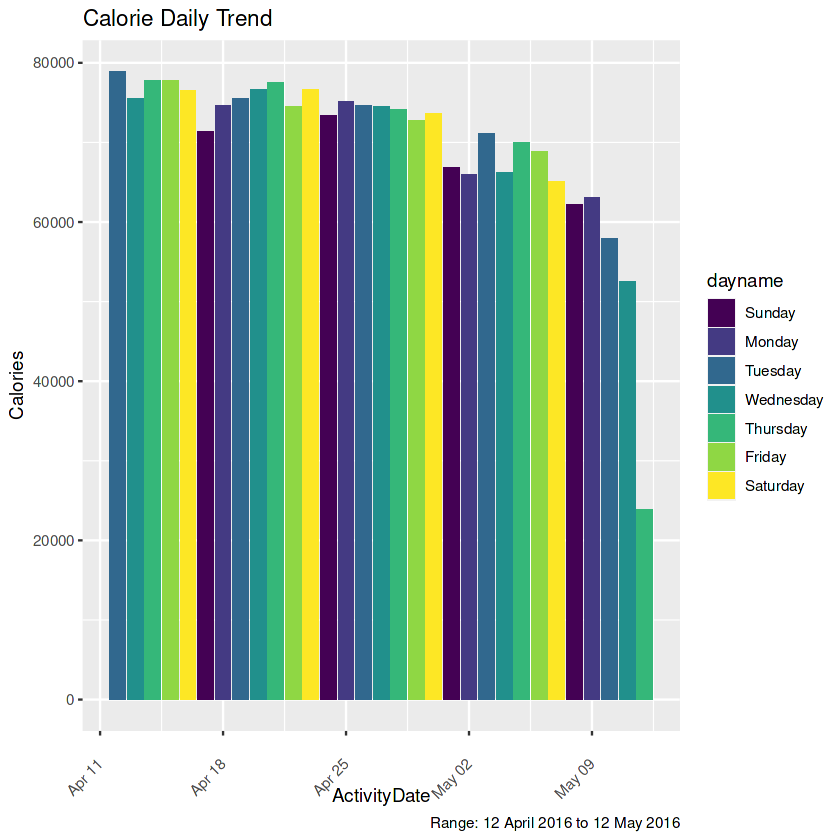

In [17]:
# Observe daily calorie trends
ggplot(data = activity_daily, aes(x = ActivityDate, y = Calories, fill = dayname)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 1)) +
  labs(title = "Calorie Daily Trend", 
       caption = "Range: 12 April 2016 to 12 May 2016")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


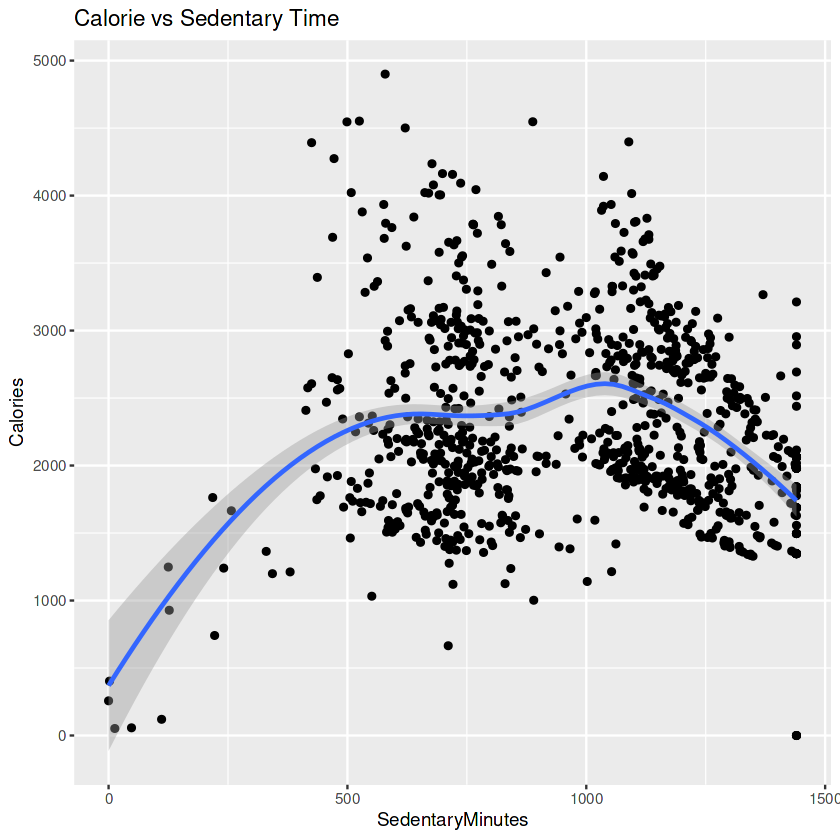

In [ ]:
# Observe sedentary times vs calorie burnt
ggplot(data = activity_daily, aes(x = SedentaryMinutes, y = Calories)) +
  geom_point() +
  geom_smooth() +
  labs(x = "SedentaryMinutes", y = "Calories",
       title = "Calorie vs Sedentary Time")

In [19]:
cor(activity_daily$SedentaryMinutes, activity_daily$Calories)

[1] -0.106973

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


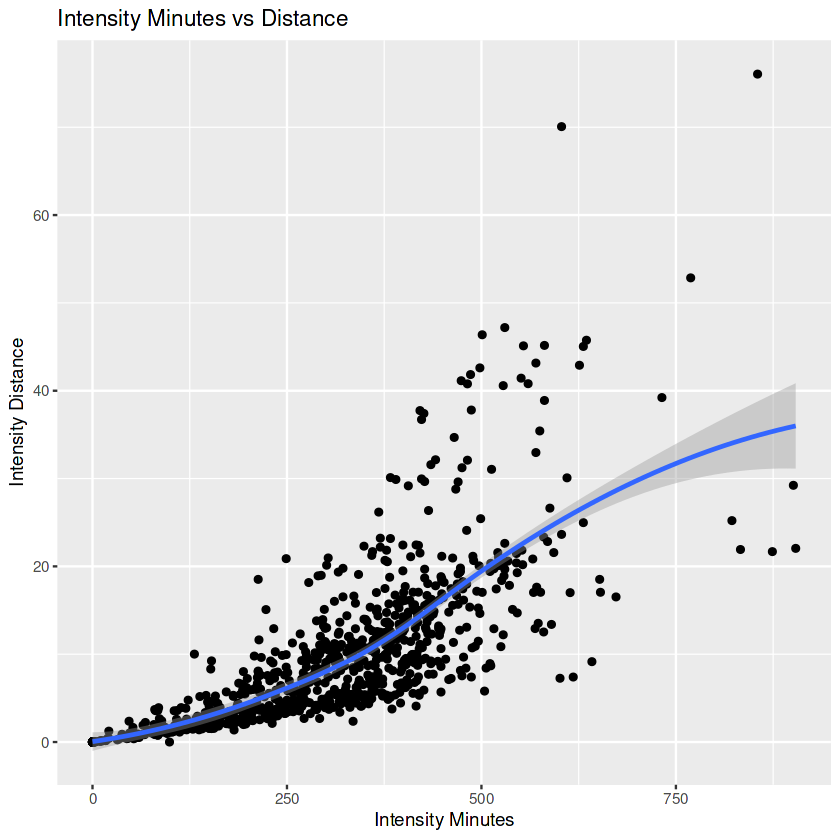

In [20]:
# Observe intensity score on both time and distance
ggplot(data = activity_daily, aes(x = intensity_minutes, y = intensity_distance)) +
  geom_point() +
  geom_smooth() +
  labs(x = "Intensity Minutes", y = "Intensity Distance",
       title="Intensity Minutes vs Distance")

In [21]:
cor(activity_daily$intensity_minutes, activity_daily$intensity_distance)

[1] 0.7541713

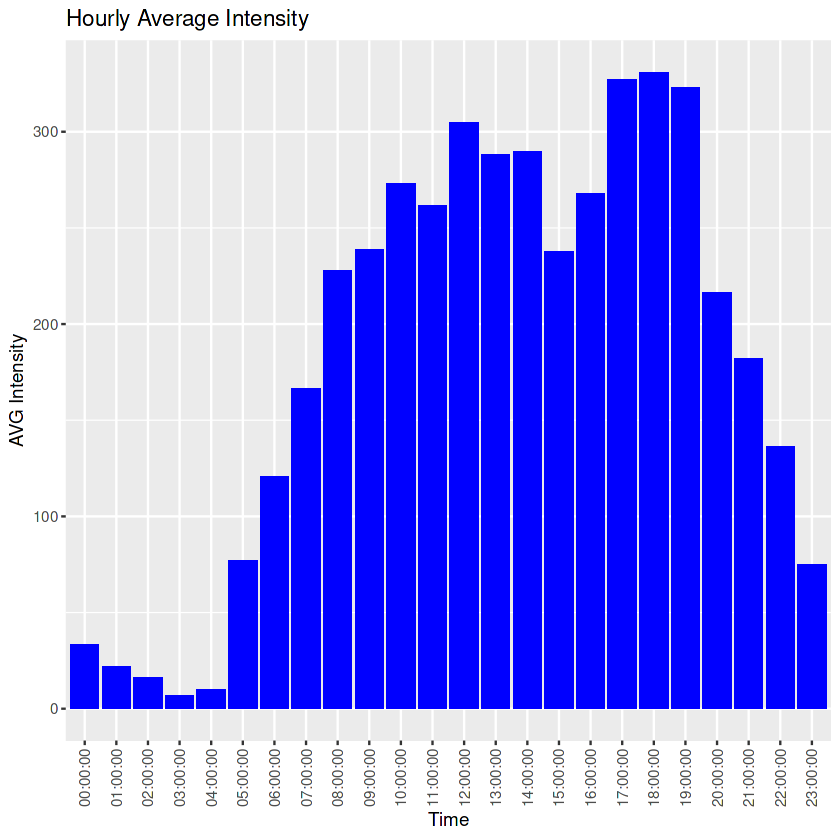

In [22]:
# Inspect hourly average intensity pattern
ggplot(data = merged_hourly, aes(x = time)) +
  geom_bar(aes(y = AverageIntensity), fill = 'blue', stat = "identity") + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
  labs(x = "Time", y = "AVG Intensity",
       title="Hourly Average Intensity")

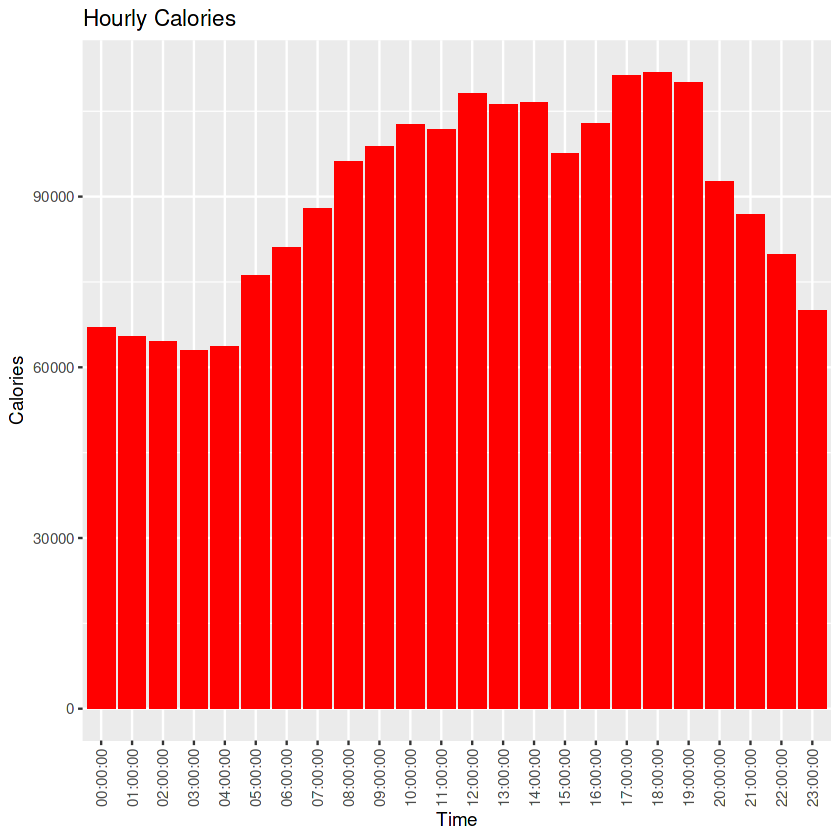

In [23]:
# Inspect hourly calorie pattern
ggplot(data = merged_hourly, aes(x = time)) +
  geom_bar(aes(y = Calories), fill = 'red', stat = "identity") + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
  labs(x = "Time", y = "Calories",
       title="Hourly Calories")

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


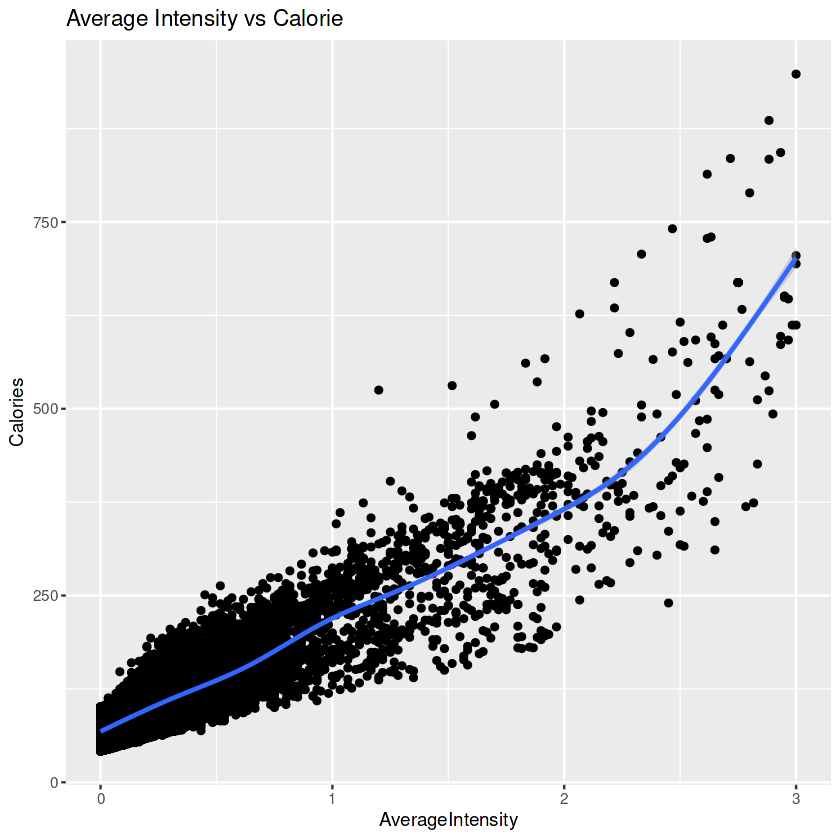

In [24]:
# Correlation between hourly intensity and calorie
ggplot(data = merged_hourly, aes(x = AverageIntensity, y = Calories)) +
  geom_point() +
  geom_smooth() +
  labs(x = "AverageIntensity", y = "Calories", title="Average Intensity vs Calorie")

In [25]:
cor(merged_hourly$AverageIntensity, merged_hourly$Calories)

[1] 0.8966161

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


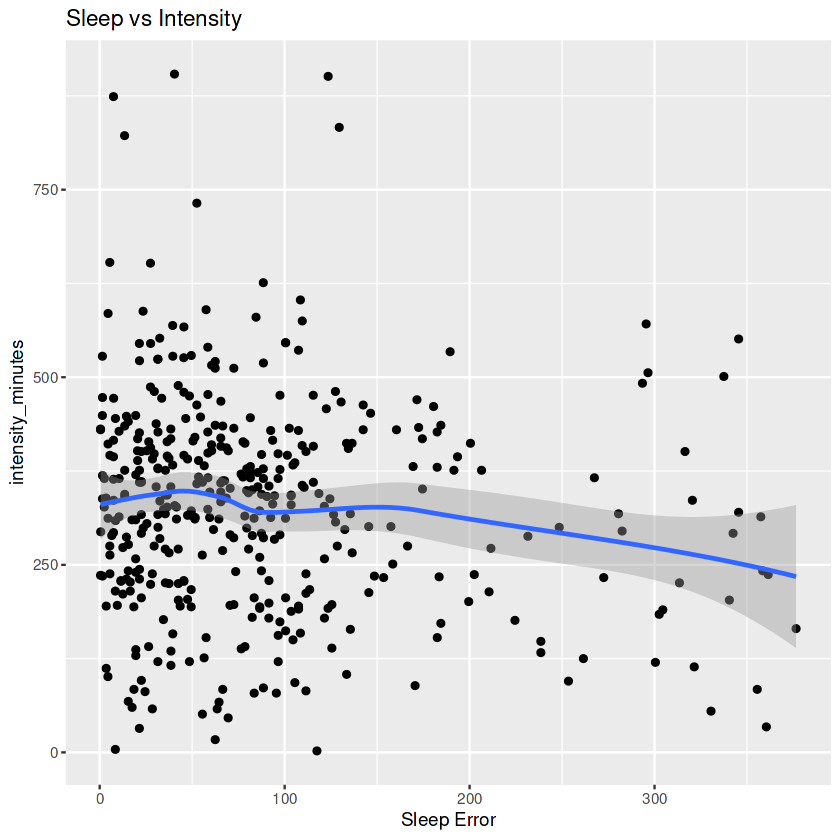

In [32]:
ggplot(data = merged_daily, aes(x = SleepError, y = intensity_minutes)) +
  geom_point() +
  geom_smooth() +
  labs(x = "Sleep Error", y = "intensity_minutes", title="Sleep vs Intensity")

In [33]:
ggsave("SleepError.png", width=14, height=10)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


In [27]:
cor(merged_daily$SleepError, merged_daily$intensity_minutes)

[1] -0.1227108

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


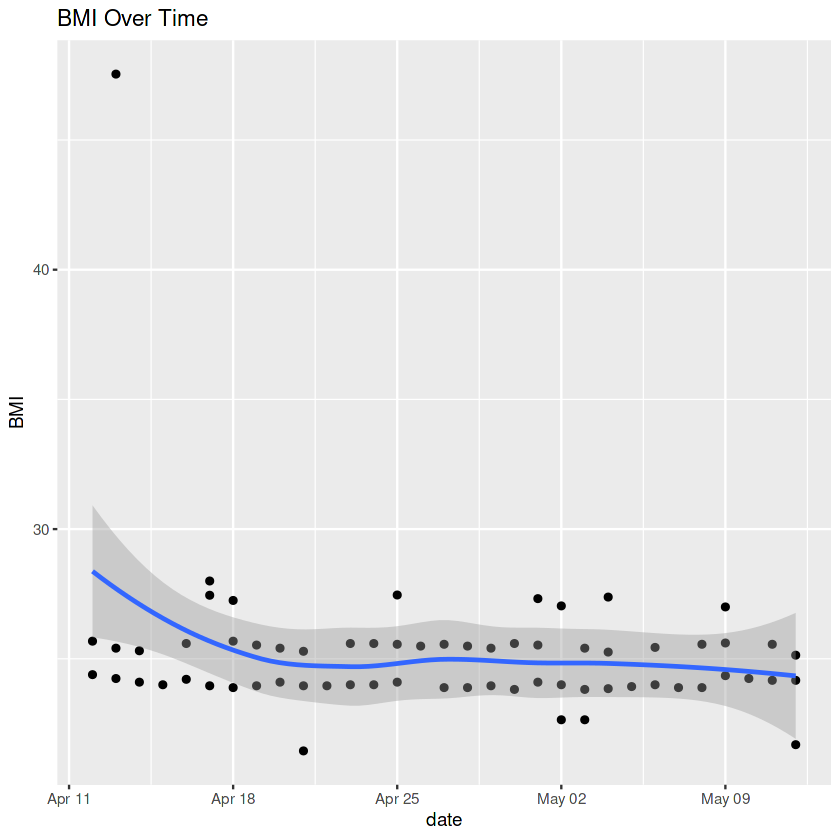

In [28]:
ggplot(data=weight_log, aes(x=date, y=BMI)) + 
  geom_point() +
  geom_smooth() + 
  labs(title="BMI Over Time")

In [29]:
weight_log_clean <- weight_log[-which.max(weight_log$BMI),]

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


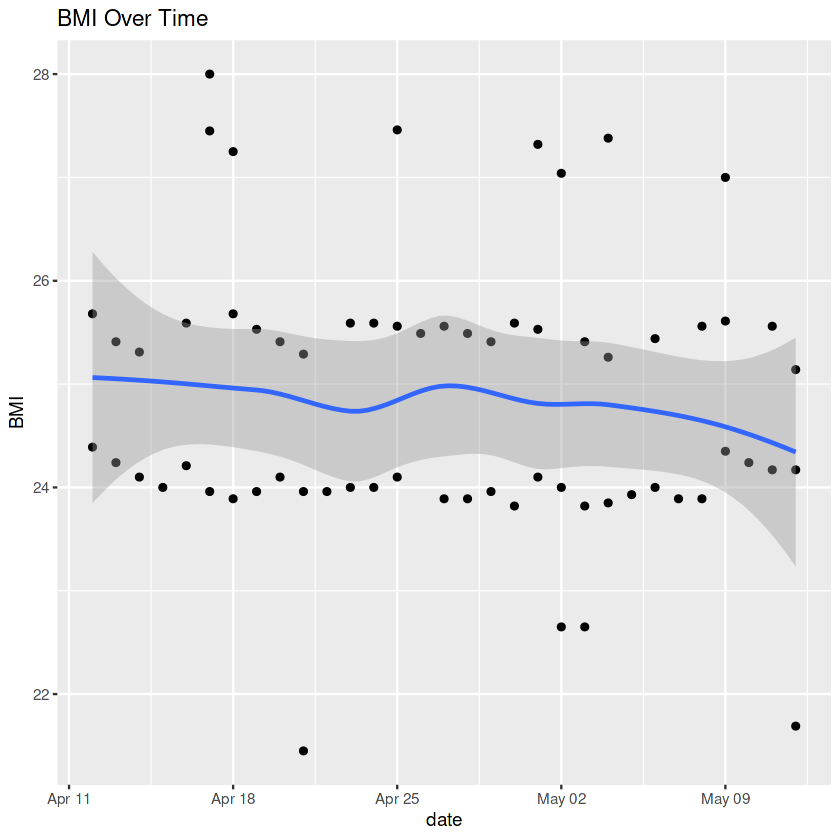

In [30]:
ggplot(data=weight_log_clean, aes(x=date, y=BMI)) + 
  geom_point() +
  geom_smooth() + 
  labs(title="BMI Over Time")

In [31]:
length(unique(weight_log_clean$Id))

[1] 7

Some notable analysis insight:

1. **Temporal Scope**: The dataset spans a period of 31 days, from 4/12/2016 to 5/12/2016, offering a comprehensive snapshot of user activity during this timeframe.

2. **User Demographics**: It's established that there are 33 distinct users contributing to this dataset. Notably, gender information is absent. Assuming a uniform distribution of genders might slightly skew interpretations, given Bellabeat's female-centric focus.

3. **Caloric Trends**: A noticeable trend reveals a gradual decrease in daily calorie expenditure over the observed period. Additionally, Sundays stand out with lower calorie burn compared to weekdays, suggesting potential variations in activity routines during weekends.

4. **Caloric Expenditure vs. Sedentary Behavior**: Surprisingly, there's a lack of a strong linear correlation between calories burned and sedentary minutes. This suggests that factors beyond sedentary behavior contribute significantly to caloric expenditure.

5. **Intensity Score Significance**: The calculated intensity score exhibits a robust relationship with both intensity minutes and distance covered, reinforcing its relevance in gauging activity levels. Both also shows strong correlation.

6. **Hourly Activity Peaks**: Hourly trends indicate heightened activity levels and calorie expenditure between 17:00 and 20:00, potentially indicating a popular timeframe for physical activity.

7. **Intensity vs. Caloric Expenditure**: Hourly data underscores a strong connection between intensity levels and calorie expenditure, further emphasizing the influence of activity intensity on caloric burn.

8. **Sleeping Error Metric**: Defined as the absolute difference between actual sleep time and its mean, the sleeping error metric introduces an interesting dimension. However, it shows no strong linear correlation with intensity minutes, implying that activity levels may not directly impact sleep quality.

9. **Outlier Handling in Weight Log**: The decision to remove a single user from the weight log data is noteworthy. This action addresses a potential outlier that might otherwise skew trends, resulting in a more accurate representation of BMI trends.
